In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test  = x_test  / 255.0
y_train = y_train.flatten()
y_test  = y_test .flatten()

170508288/170498071 [==============================] - 73s 0us/step
x_train: (50000, 32, 32, 3)
y_train: (10000,)


In [4]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')

x_train: (50000, 32, 32, 3)
y_train: (50000,)


In [3]:
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


In [5]:
# Build the model using the Functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32,  kernel_size=(3, 3), strides=2, activation='relu')(i)
x = Conv2D(filters=64,  kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=1024, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=K,    activation='softmax')(x)

model = Model(i, x)

# Compile and fit
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5723 - accuracy: 0.4269 - val_loss: 1.3904 - val_accuracy: 0.4960
Epoch 2/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2962 - accuracy: 0.5309 - val_loss: 1.1850 - val_accuracy: 0.5717
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1573 - accuracy: 0.5881 - val_loss: 1.0876 - val_accuracy: 0.6124
Epoch 4/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0641 - accuracy: 0.6190 - val_loss: 0.9675 - val_accuracy: 0.6583
Epoch 5/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9854 - accuracy: 0.6486 - val_loss: 0.9464 - val_accuracy: 0.6692
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9291 - accuracy: 0.6692 - val_loss: 0.8998 - val_accuracy: 0.6884
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8772 - accuracy: 0.6881 - val_loss: 0.8828 -

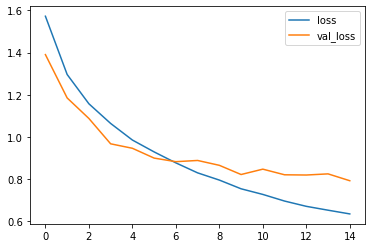

In [7]:
# Loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

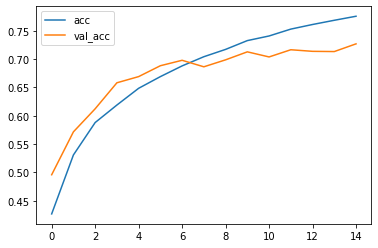

In [8]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()